In [118]:
## cluster

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [119]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2)) #distance formula

In [120]:
class KMeans:
    def __init__(self, K, tol=1e-6, max_iters=100, plot_steps=False):
        self.tol = tol
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize centroids randomly
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = np.array([self.X[idx] for idx in random_sample_idxs])

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        self.inertia = np.sum([np.sum((self.X[cluster] - self.centroids[i])**2) for i, cluster in enumerate(self.clusters)])
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx # labels returns a 1d list with index of which cluster the row is in
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X): # idx = index, sample= row
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            if cluster:  # Avoid empty clusters
                cluster_mean = np.mean(self.X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return all(distance < self.tol for distance in distances)

    def plot(self):
        if self.n_features > 2:
            print("Dataset has more than 2 features. Using PCA for visualization.")
            pca = PCA(n_components=2)
            X_reduced = pca.fit_transform(self.X)
            centroids_reduced = pca.transform(self.centroids)
        else:
            X_reduced = self.X
            centroids_reduced = self.centroids

        fig, ax = plt.subplots(figsize=(12, 8))
        for i, cluster in enumerate(self.clusters):
            if len(cluster) == 0:
                continue
            points = X_reduced[cluster].T
            ax.scatter(*points, label=f"Cluster {i}")
        for point in centroids_reduced:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.legend()
        plt.show()


In [121]:
X = pd.read_csv("Clustering_Data.csv")
print(X.head())
X = X.dropna()

# Scaling data
'''data_mean = data.mean(axis=0)
data_std = data.std(axis=0)'''
X= (X-np.min(X))/(np.max(X)-np.min(X))

n, m = X.shape

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [122]:
X=X.to_numpy()

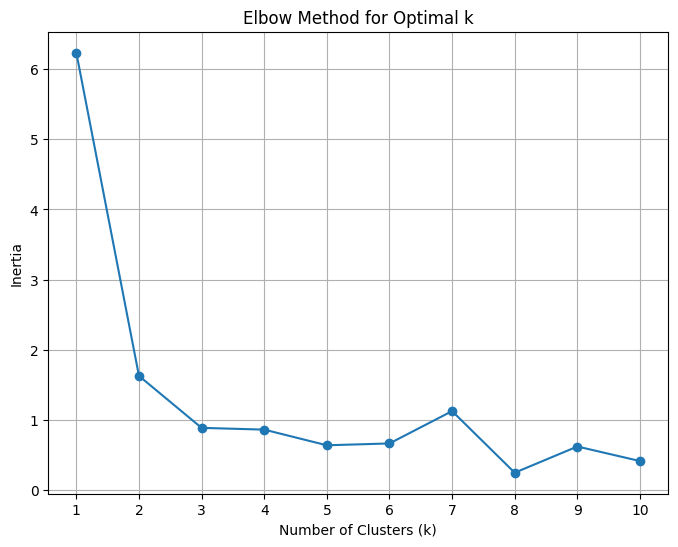

In [123]:
# inertia



max_k = 10
inertias = []
for k in range(1, max_k+1):
  kmeans = KMeans(k, 100) # runs init
  kmeans.predict(X)
  inertias.append(kmeans.inertia)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()


(178, 14)
3
Dataset has more than 2 features. Using PCA for visualization.


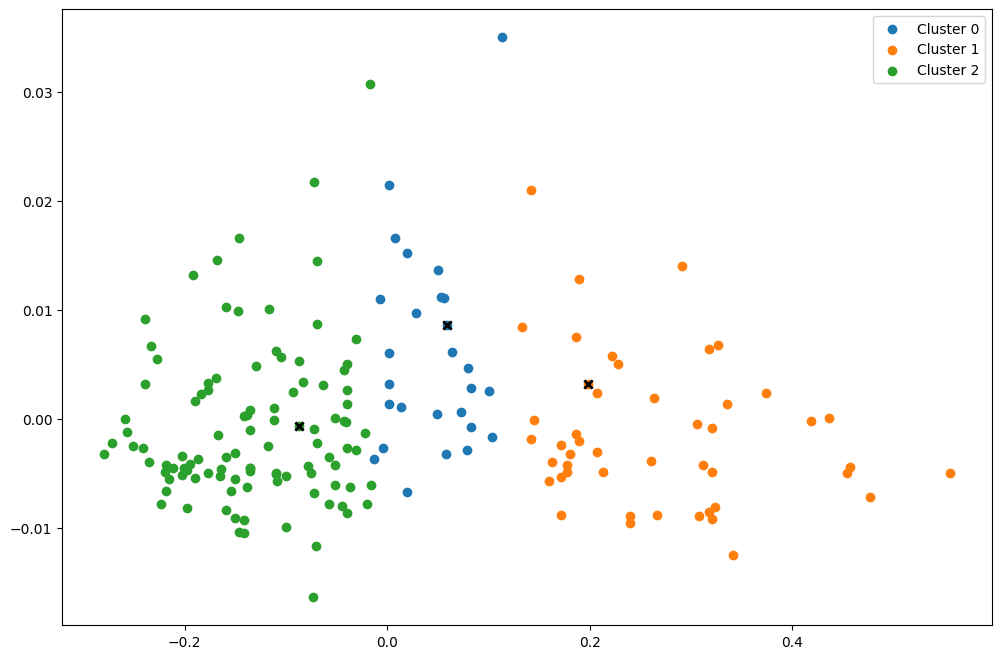

Dataset has more than 2 features. Using PCA for visualization.


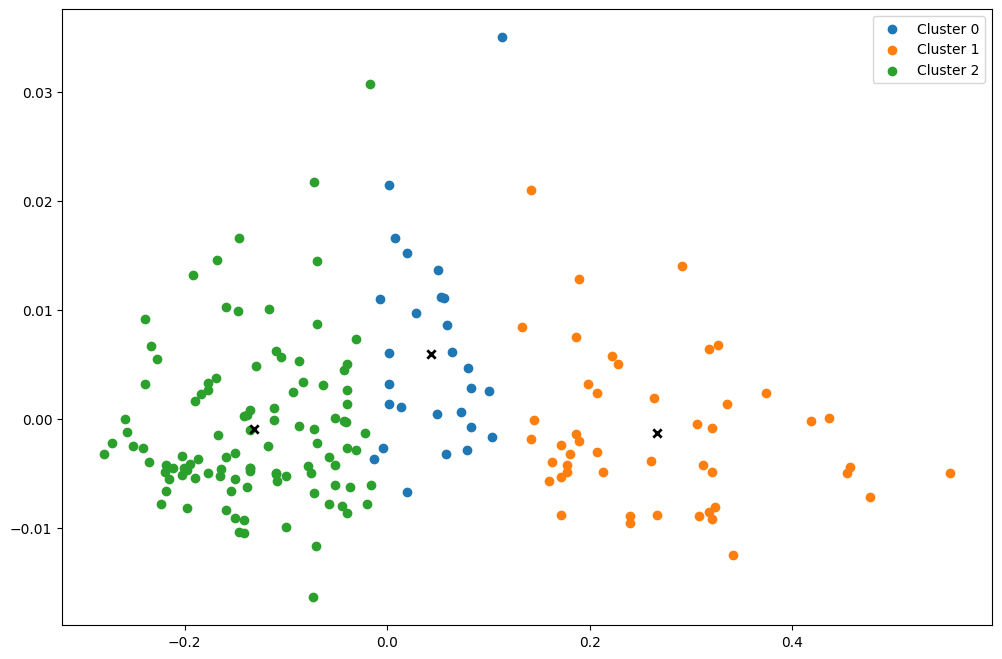

Dataset has more than 2 features. Using PCA for visualization.


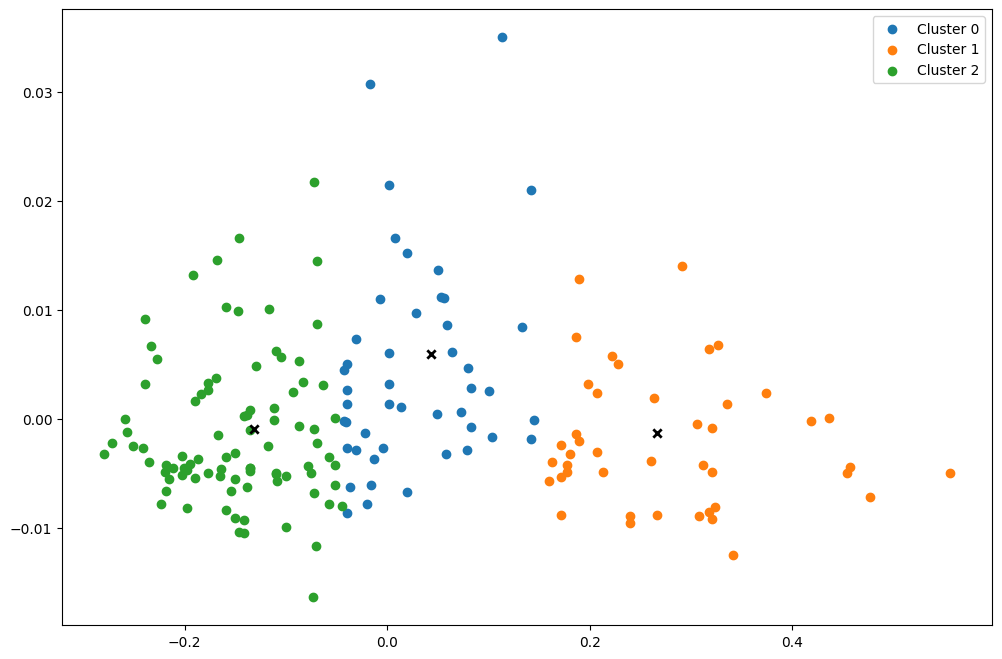

Dataset has more than 2 features. Using PCA for visualization.


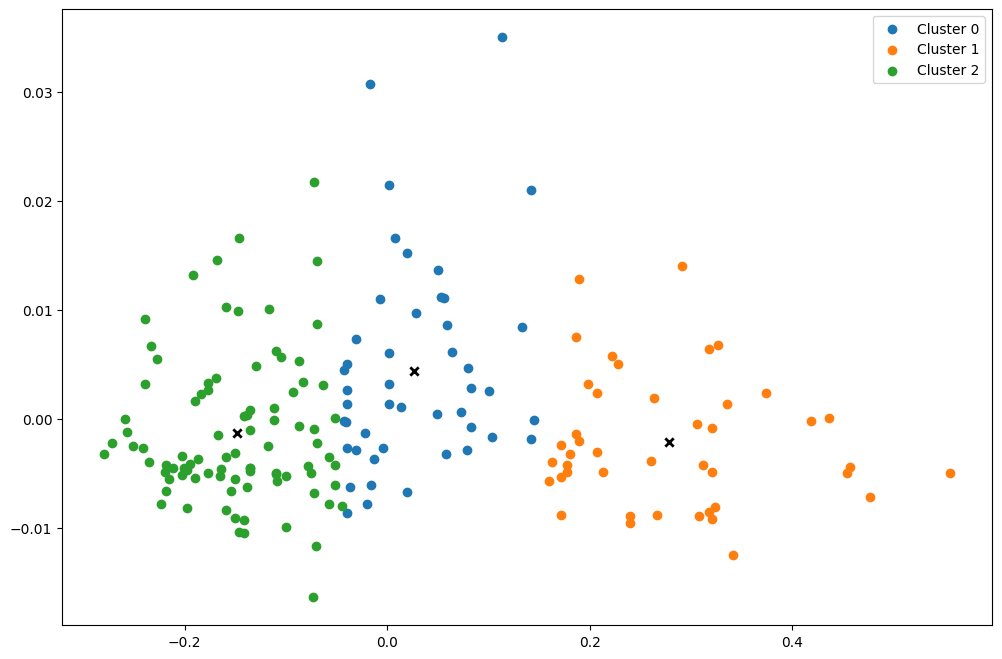

Dataset has more than 2 features. Using PCA for visualization.


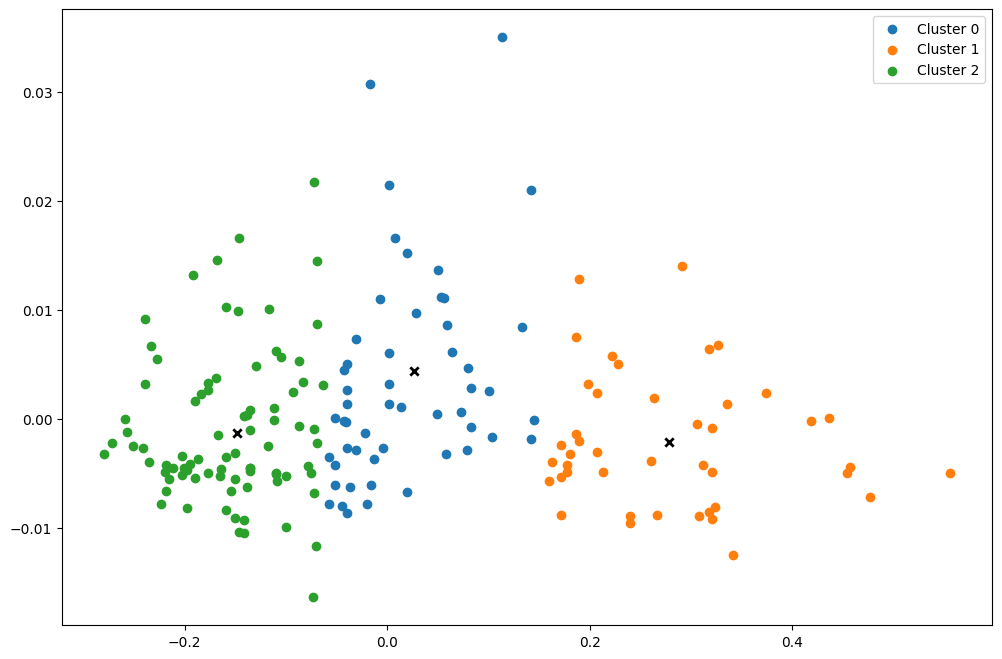

Dataset has more than 2 features. Using PCA for visualization.


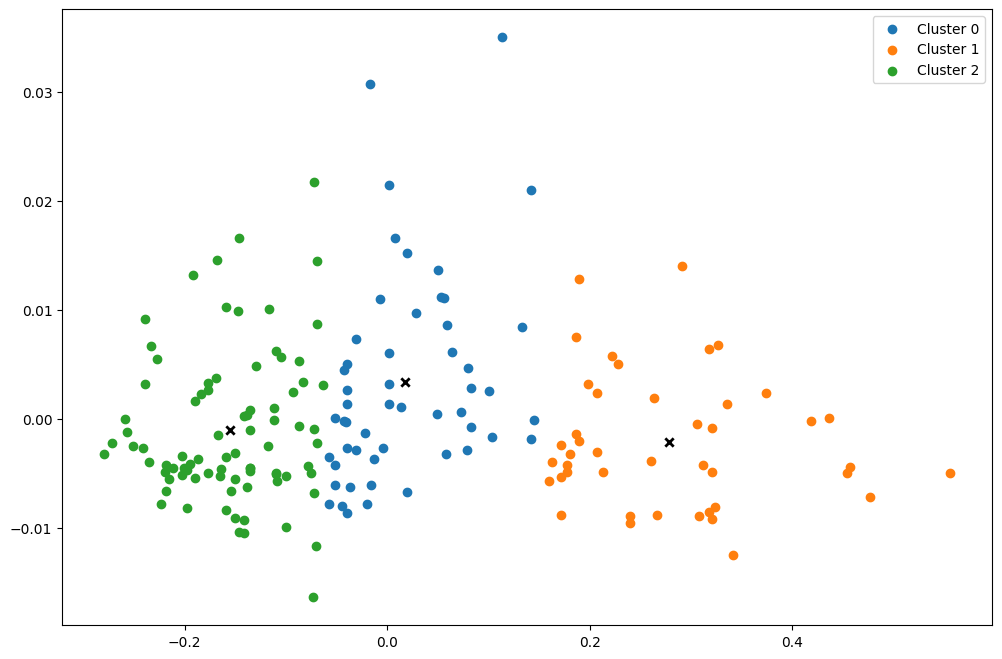

Dataset has more than 2 features. Using PCA for visualization.


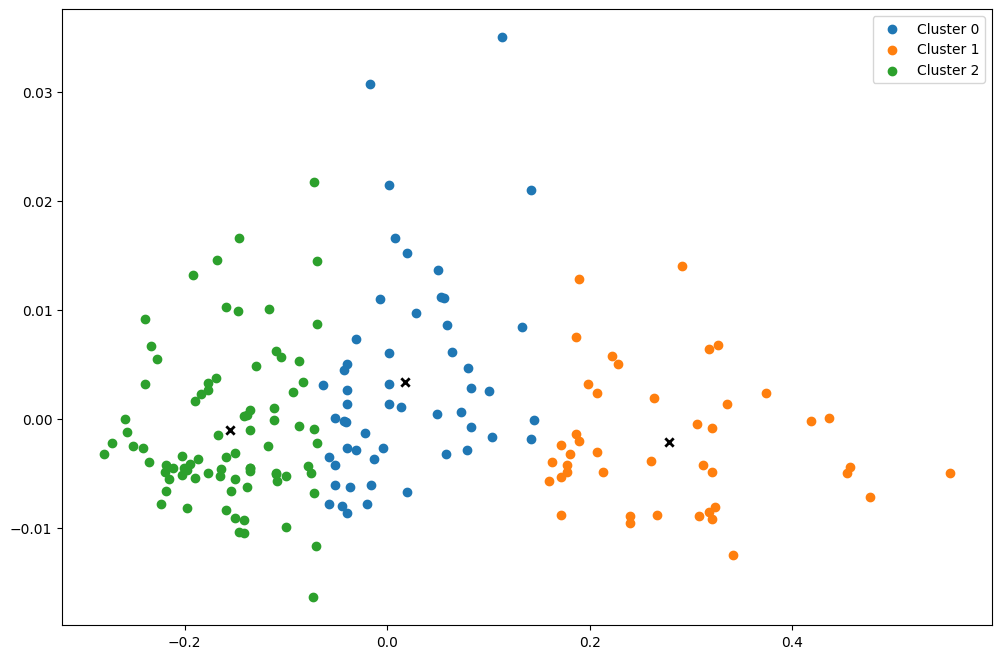

Dataset has more than 2 features. Using PCA for visualization.


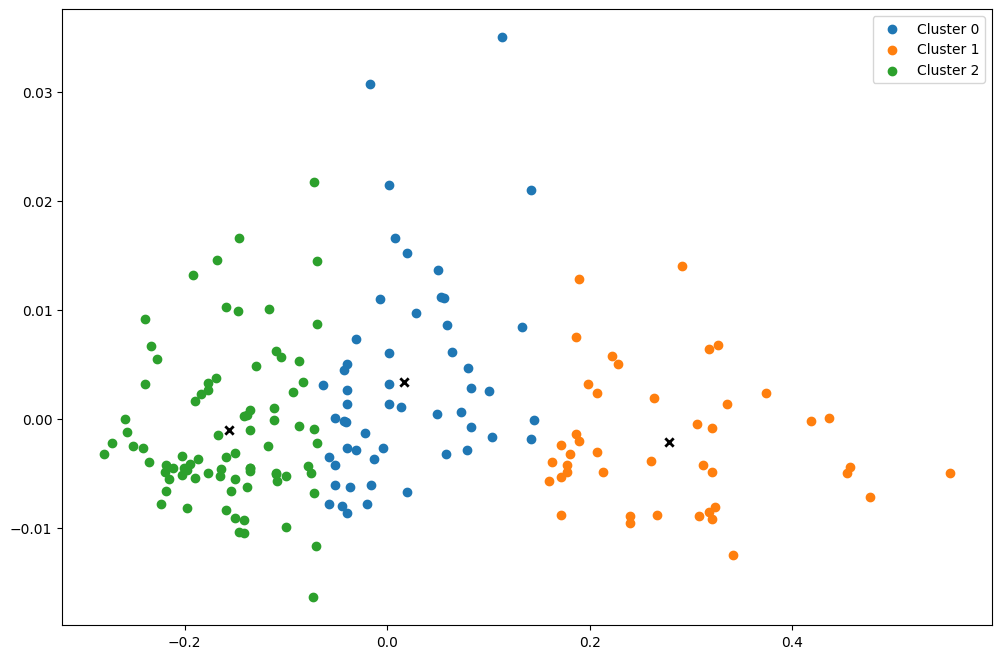

Dataset has more than 2 features. Using PCA for visualization.


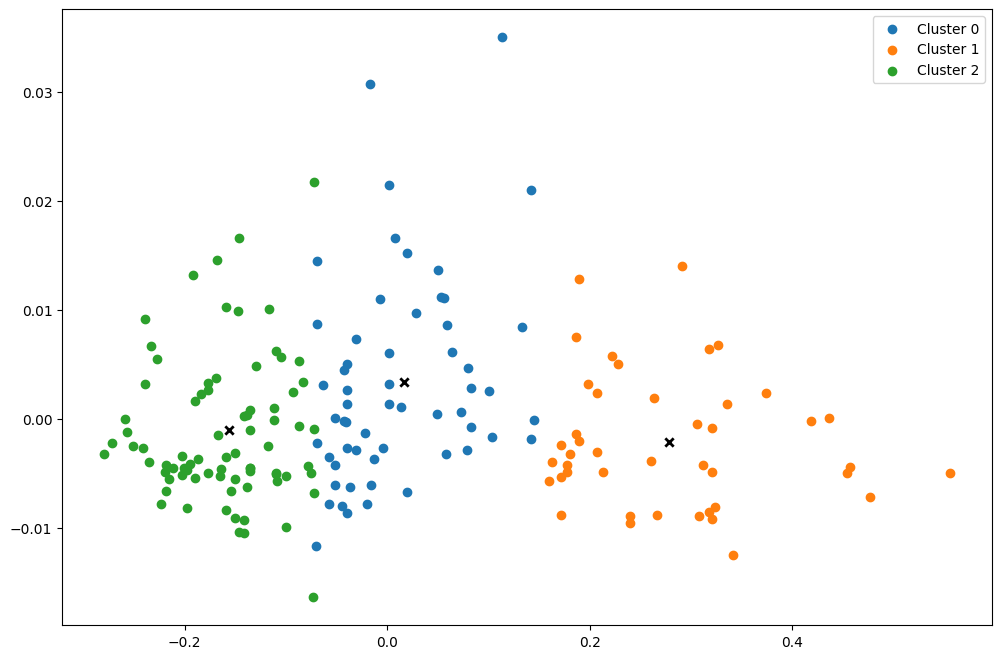

Dataset has more than 2 features. Using PCA for visualization.


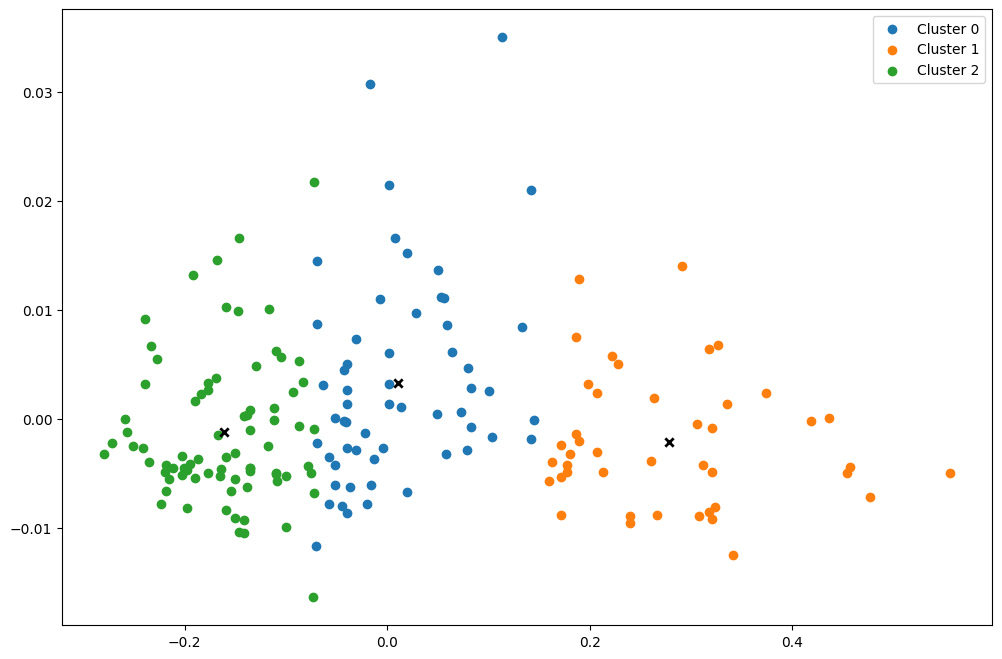

Dataset has more than 2 features. Using PCA for visualization.


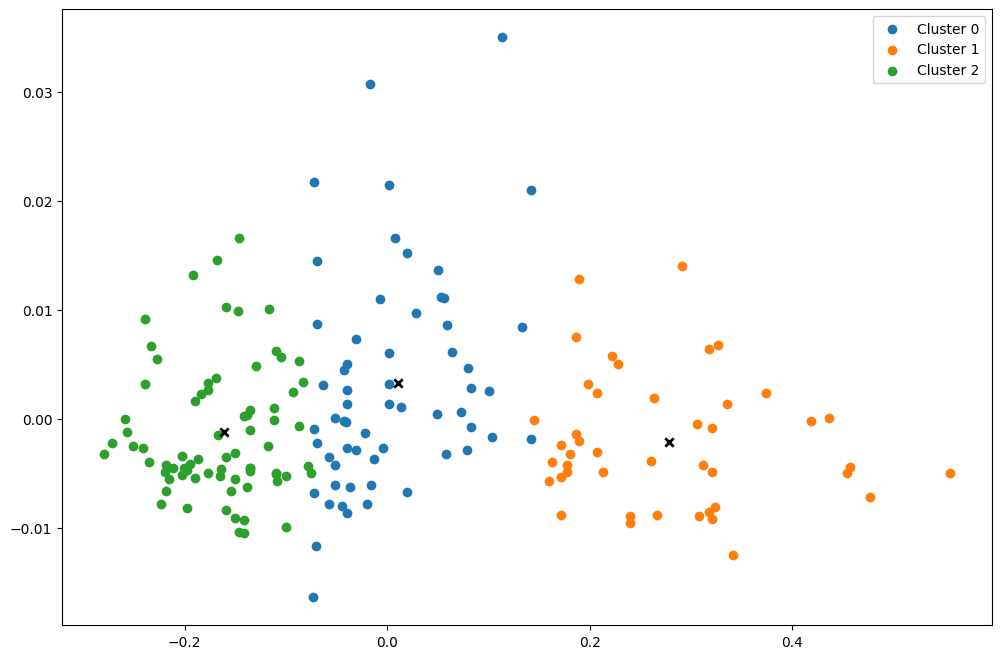

Dataset has more than 2 features. Using PCA for visualization.


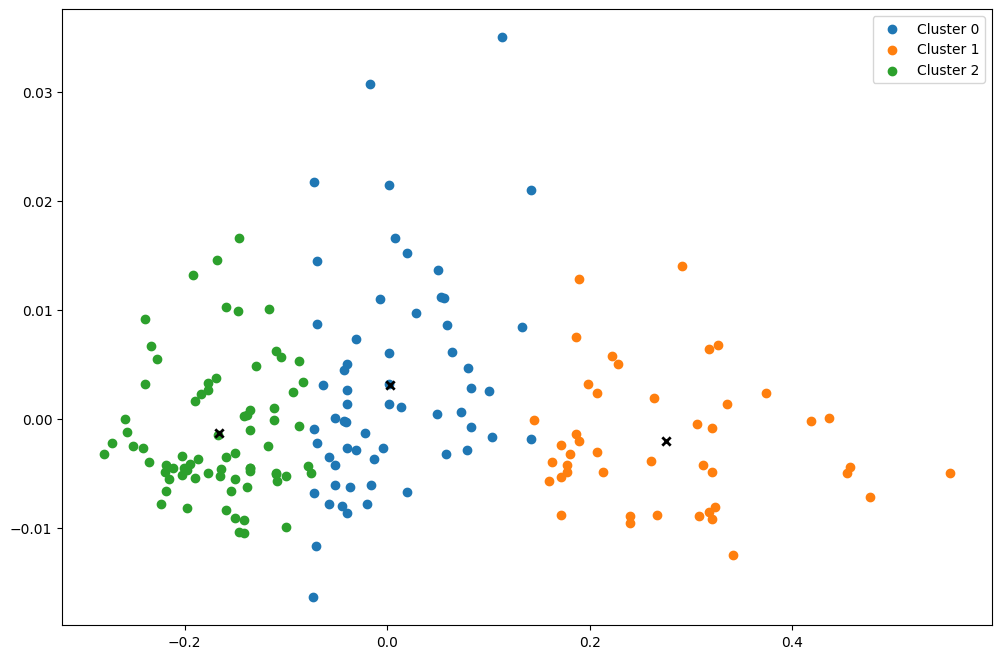

Dataset has more than 2 features. Using PCA for visualization.


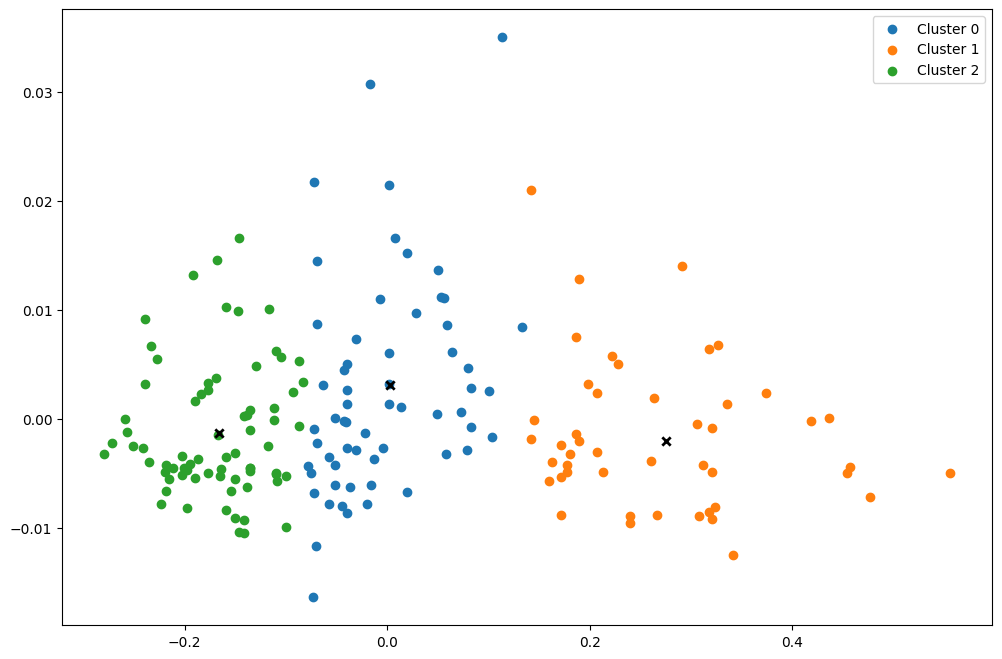

Dataset has more than 2 features. Using PCA for visualization.


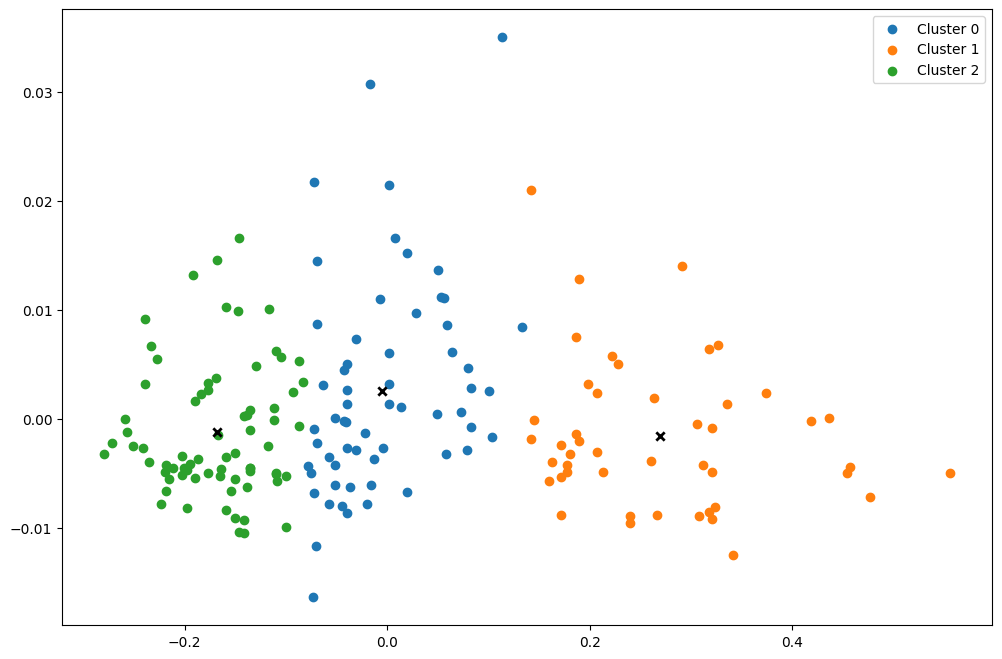

Dataset has more than 2 features. Using PCA for visualization.


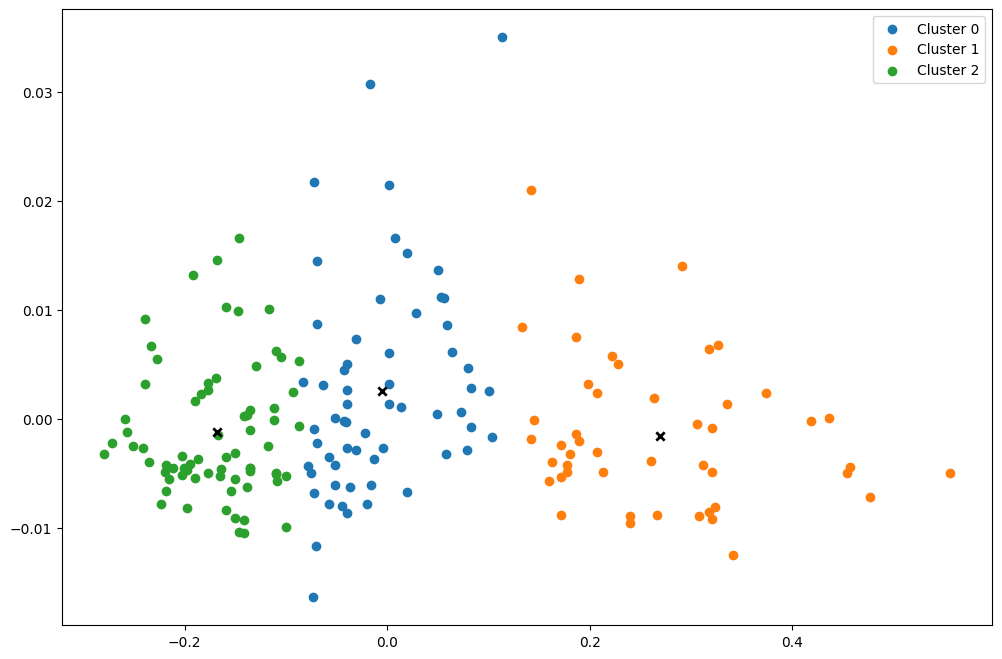

Dataset has more than 2 features. Using PCA for visualization.


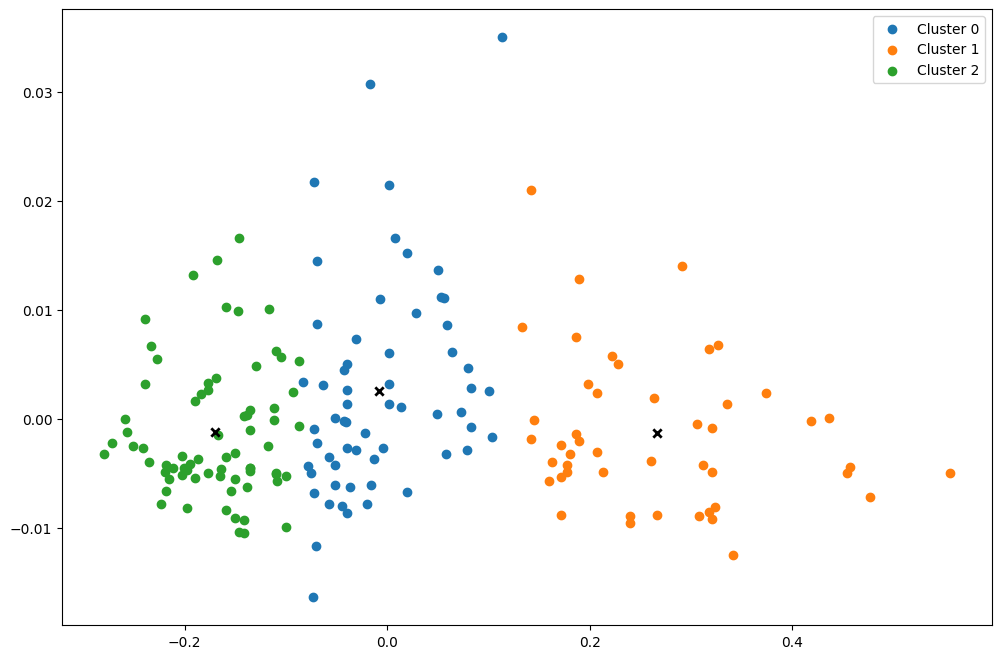

Dataset has more than 2 features. Using PCA for visualization.


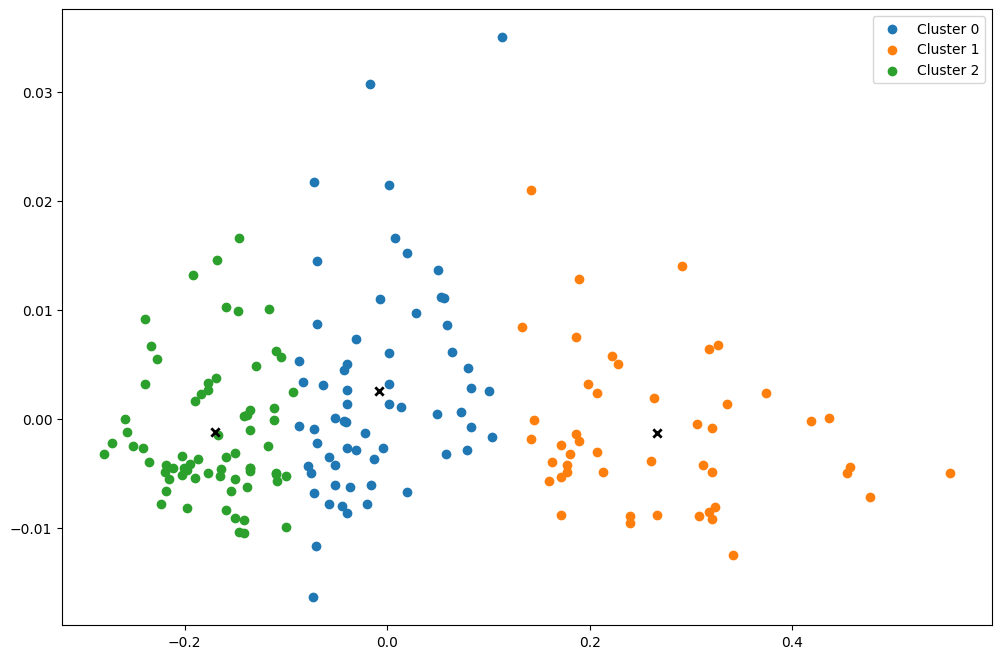

Dataset has more than 2 features. Using PCA for visualization.


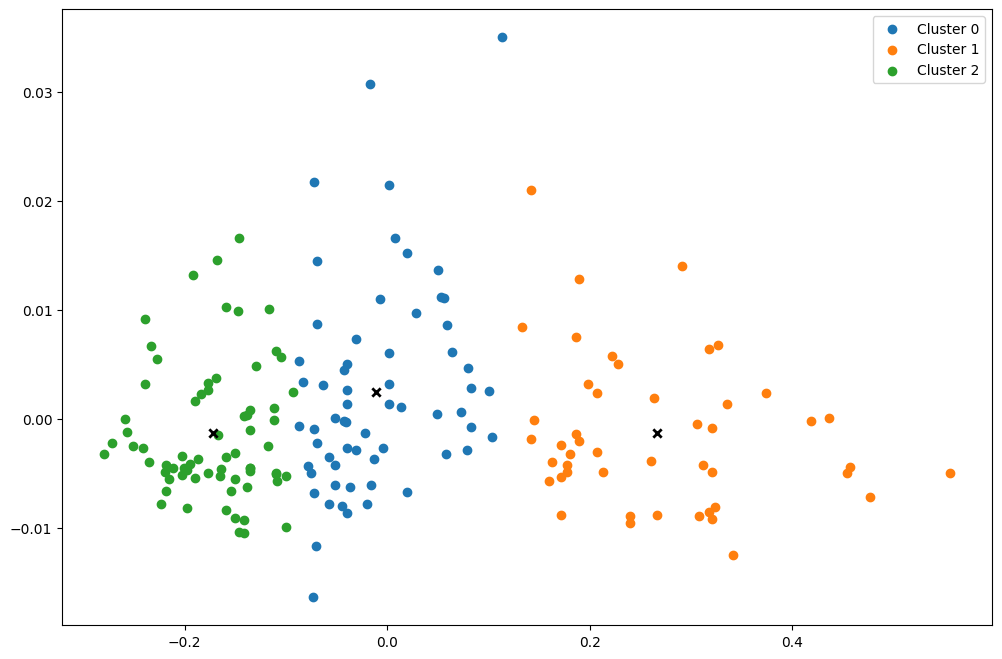

Dataset has more than 2 features. Using PCA for visualization.


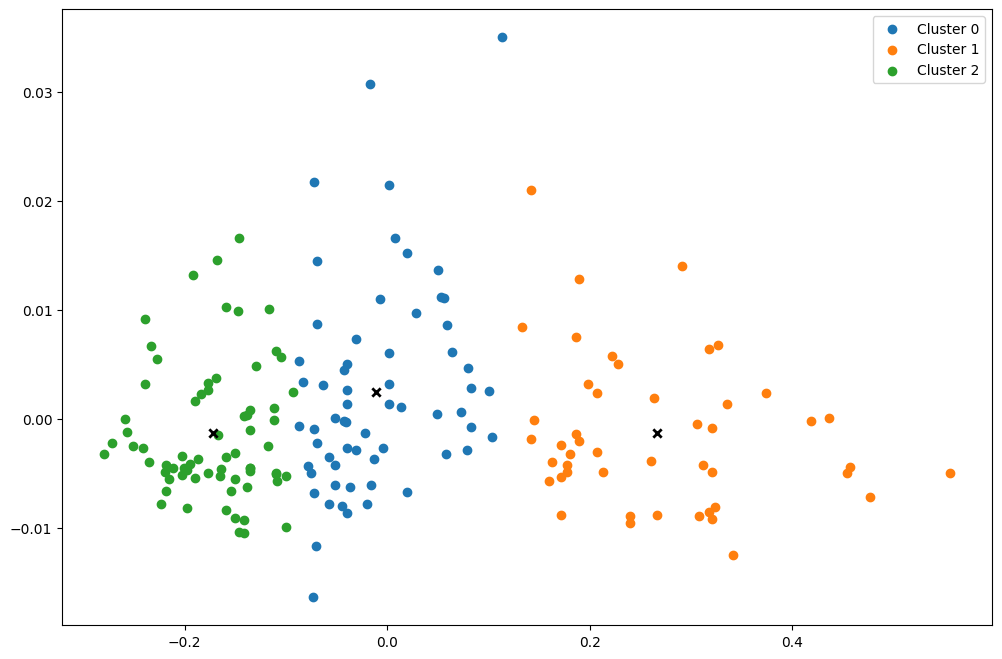

Dataset has more than 2 features. Using PCA for visualization.


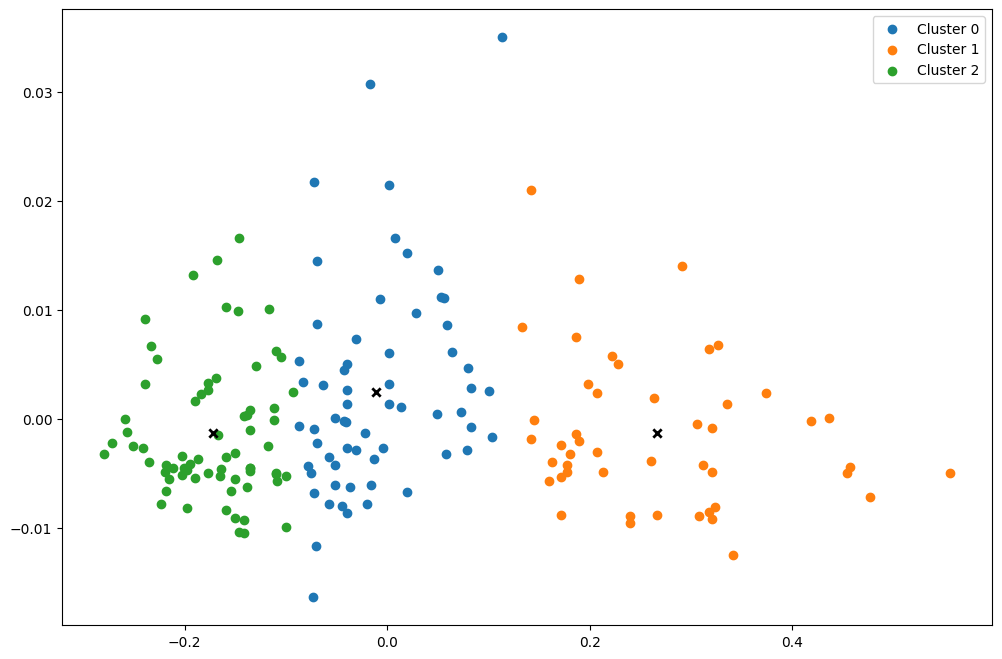

In [124]:
# testing

if __name__ == "__main__":
    np.random.seed(42) # to make it reproducible
    from sklearn.datasets import make_blobs




    #X,y= make_blobs(centers=4, n_samples=n, n_features=m, shuffle=True, random_state=40)
    print (X.shape)

    clusters = len(np.unique(y))
    print (clusters)

    k=KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()